## Project 4- by Mahendra Shaji Kurian

### Using the csv file created through webscrapping for further analysis


In [1]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from sklearn.tree import DecisionTreeClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDRegressor, SGDClassifier
from sklearn.preprocessing import StandardScaler


sns.set_style('darkgrid')


/home/mahendra/anaconda2/envs/python3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/mahendra/anaconda2/envs/python3/lib/python3.6/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
# From the web scrapping using beautiful soup
data = pd.read_csv('./Final_Post.csv')

In [3]:
data.head()

,keyword,pagenumber,title,location,region,salary,worktype,advertiser,classification,jd,url
0,Data-Scientist,1,b'Data Scientist\r\n ',b'Sydney',"CBD, Inner West & Eastern Suburbs",NaN,b'Full Time',NRMA Motoring &amp; Services -,b'Marketing &amp; Communications',"['\n', <p>The NRMA was born to keep people mov...",https://www.seek.com.au/job/33406210?type=stan...
1,Data-Scientist,1,NaN,b'Sydney',"CBD, Inner West & Eastern Suburbs",b'$700 - 900 per day',b'Contract/Temp',Opus Recruitment Solutions -,b'Science &amp; Technology',[<strong>DATA SCIENTIST - TOP 100 ASX COMPANY<...,https://www.seek.com.au/job/33404974?type=stan...
2,Data-Scientist,1,b'Data Scientist\r\n ',b'Sydney',"CBD, Inner West & Eastern Suburbs",NaN,b'Full Time',Caltex Australia -,b'Science &amp; Technology',"['\n', <p>At Caltex, we’re with you all the wa...",https://www.seek.com.au/job/33404052?type=stan...
3,Data-Scientist,1,b'Data Engineer/Scientist/Analytics Consultant...,b'Sydney',"CBD, Inner West & Eastern Suburbs",b'Competitive and negotiable',b'Full Time',BI &amp; DW Australia -,b'Information &amp; Communication Technology',[<strong>A leading IM Professional Services co...,https://www.seek.com.au/job/33394134?type=stan...
4,Data-Scientist,1,b'Sr. Data Scientist - Perm -Sydney\r\n ',b'Sydney',"CBD, Inner West & Eastern Suburbs",b'$150-$160K + Super',b'Full Time',Infopeople -,b'Science &amp; Technology',['My client is seeking an experienced Data Sci...,https://www.seek.com.au/job/33378604?type=stan...


In [4]:
data.shape

(1118, 11)

trying to clean up the data we have. and see what we can do.

data.isnull().sum()

In [5]:
data.salary.fillna(value=0, inplace=True)

In [6]:
data.title.fillna(value=data.keyword,axis=0, inplace=True)

In [7]:
data.region.fillna(value="NA", inplace=True)

In [8]:
data.dropna(inplace=True)

In [9]:
data.isnull().sum()

keyword           0
pagenumber        0
title             0
location          0
region            0
salary            0
worktype          0
advertiser        0
classification    0
jd                0
url               0
dtype: int64

In [10]:
data.shape

(1107, 11)

In [11]:
data.title.value_counts()

Business-Intelligence                                                                             66
Data-Analyst                                                                                      34
Data-Architect                                                                                    30
Data-Scientist                                                                                    23
b'Data Scientist\r\n      '                                                                       16
b'Data Scientist\r\n    '                                                                         14
b'Data Analyst\r\n      '                                                                         13
b'Business Intelligence Analyst\r\n      '                                                         7
b'Data Analyst\r\n    '                                                                            7
b'GP Representatives - Melbourne New Roles! CBD, South East and Eastern Suburbs\r\n    '   

In [12]:
eliminate=['  ','b\'',"\\r","\\n",'\'','-','amp\;']
# data.title = data.title.map(lambda x: x.replace('b',''))
eliminate

['  ', "b'", '\\r', '\\n', "'", '-', 'amp\\;']

In [13]:
for ch in eliminate:
    data.title = data.title.map(lambda x: x.replace(ch,''))

In [14]:
data.title.value_counts()

BusinessIntelligence                                                                   66
DataAnalyst                                                                            34
Data Scientist                                                                         33
DataArchitect                                                                          30
Data Analyst                                                                           26
DataScientist                                                                          23
Senior Data Scientist                                                                   7
Business Intelligence Analyst                                                           7
Senior Business Intelligence Analyst                                                    5
Business Intelligence Developer                                                         5
GP Representatives  Melbourne New Roles! CBD, South East and Eastern Suburbs            5
Analyst   

In [15]:
data.location.value_counts()

b'Sydney'       664
b'Melbourne'    340
b'Brisbane'     103
Name: location, dtype: int64

In [16]:
data.location = data.location.map(lambda x: x.replace('b\'','').replace('\'',''))

In [17]:
data.location.value_counts()

Sydney       664
Melbourne    340
Brisbane     103
Name: location, dtype: int64

In [18]:
data.region.value_counts()

 CBD, Inner West & Eastern Suburbs      466
 CBD & Inner Suburbs                    322
NA                                      143
 North Shore & Northern Beaches          42
 Parramatta & Western Suburbs            33
 Ryde & Macquarie Park                   25
 Northern Suburbs                        13
 Bayside & South Eastern Suburbs         12
 Eastern Suburbs                         12
 North West & Hills District             11
 Western Suburbs                          8
 Bayside & Eastern Suburbs                6
 South West & M5 Corridor                 5
 Southern Suburbs & Sutherland Shire      5
 Southern Suburbs & Logan                 4
Name: region, dtype: int64

In [19]:
data.worktype.value_counts()

b'Full Time'        773
b'Contract/Temp'    329
b'Part Time'          5
Name: worktype, dtype: int64

In [20]:
data.worktype = data.worktype.map(lambda x: x.replace('b\'','').replace('\'',''))

In [21]:
data.worktype.value_counts()

Full Time        773
Contract/Temp    329
Part Time          5
Name: worktype, dtype: int64

In [22]:
data.advertiser.value_counts()

Private Advertiser -                                                                         24
FIRESOFT Consulting -                                                                        22
Hudson -                                                                                     20
Infinity Pro -                                                                               17
Peoplebank Australia NSW -                                                                   17
Talent â Winner âSeek Large Recruitment Agency of the Yearâ 3 consecutive years! -     16
Perigon Group Pty Limited -                                                                  15
Paxus Australia Pty Ltd -                                                                    15
Robert Walters -                                                                             15
PBI Search -                                                                                 13
FourQuarters Recruitment -              

In [23]:
data.advertiser = data.advertiser.map(lambda x: x.replace(' - ','').replace(' -','').replace('amp;',''))

In [24]:
data.advertiser.value_counts()

Private Advertiser                                                                        24
FIRESOFT Consulting                                                                       22
Hudson                                                                                    20
Peoplebank Australia NSW                                                                  17
Infinity Pro                                                                              17
Talent â Winner âSeek Large Recruitment Agency of the Yearâ 3 consecutive years!    16
Paxus Australia Pty Ltd                                                                   15
Robert Walters                                                                            15
Perigon Group Pty Limited                                                                 15
PBI Search                                                                                13
FourQuarters Recruitment                                              

In [25]:
data.classification.value_counts()

b'Information &amp; Communication Technology'    730
b'Science &amp; Technology'                       64
b'Marketing &amp; Communications'                 47
b'Accounting'                                     44
b'Sales'                                          42
b'Banking &amp; Financial Services'               39
b'Consulting &amp; Strategy'                      30
b'Government &amp; Defence'                       19
b'Education &amp; Training'                       15
b'Human Resources &amp; Recruitment'              12
b'Healthcare &amp; Medical'                       11
b'Insurance &amp; Superannuation'                 10
b'Administration &amp; Office Support'             9
b'Engineering'                                     9
b'Call Centre &amp; Customer Service'              5
b'Advertising, Arts &amp; Media'                   5
b'CEO &amp; General Management'                    4
b'Community Services &amp; Development'            3
b'Design &amp; Architecture'                  

In [26]:
data.classification = data.classification.map(lambda x: x.replace('b\'','').replace('\'','').replace('amp;',''))

In [27]:
data.classification.value_counts()

Information & Communication Technology    730
Science & Technology                       64
Marketing & Communications                 47
Accounting                                 44
Sales                                      42
Banking & Financial Services               39
Consulting & Strategy                      30
Government & Defence                       19
Education & Training                       15
Human Resources & Recruitment              12
Healthcare & Medical                       11
Insurance & Superannuation                 10
Administration & Office Support             9
Engineering                                 9
Call Centre & Customer Service              5
Advertising, Arts & Media                   5
CEO & General Management                    4
Design & Architecture                       3
Community Services & Development            3
Manufacturing, Transport & Logistics        2
Construction                                2
Hospitality & Tourism             

In [28]:
data.jd[0]

'[\'\\n\', <p>The NRMA was born to keep people moving, and we have been doing this for nearly 100 years. Our vision is to create indispensable connections with our Members’ mobility through\r\n<strong>my car, my journey</strong> and <strong>my destination.</strong><br/>\n<br/>\r\nOur Members enjoy our legendary roadside assistance, car servicing and repairs, Thrifty car and truck rentals, the latest fuel prices and more via the\r\n<strong>mynrma app</strong>, discounted travel and accommodation at our Holiday parks, Travelodge and Hotel Kurrajong Canberra<br/>\n<br/>\n<strong>Your opportunity</strong><br/>\n<br/>\r\nData is an incredibly important area of growth for the NRMA. This year we have made a significant investment in our people and technology and have already had a fantastic response for the real-time Fuel and Parking features which we launched in the MyNRMA app\r\n late last year. But this is just the beginning.<br/>\n<br/>\r\nThe <strong>Data Scientist</strong> will have a s

In [29]:
eliminate=['  ','b\'',"\r",'\'','-','amp\;','\n','<p>','</p>','<b>','</b>','<li>','</li>','<br>','<br/>','<strong>','</strong>','<ul>','</ul>','<div>','</div>',', ']

In [30]:
for ch in eliminate:
    data.jd = data.jd.map(lambda x: x.replace(ch,''))

In [31]:
data.jd[0]

'[\\nThe NRMA was born to keep people movingand we have been doing this for nearly 100 years. Our vision is to create indispensable connections with our Members’ mobility throughmy carmy journey and my destination.Our Members enjoy our legendary roadside assistancecar servicing and repairsThrifty car and truck rentalsthe latest fuel prices and more via themynrma appdiscounted travel and accommodation at our Holiday parksTravelodge and Hotel Kurrajong CanberraYour opportunityData is an incredibly important area of growth for the NRMA. This year we have made a significant investment in our people and technology and have already had a fantastic response for the realtime Fuel and Parking features which we launched in the MyNRMA app late last year. But this is just the beginning.The Data Scientist will have a stronger focus on expanding and enriching our membercustomer data assets &amp; capabilitythrough close collaboration with Technology and Product Management.Here is where you come in!\\

In [32]:
data.salary.value_counts()

0                                                              680
b'End User Company - Great Package, Bonuses + Agile'            12
b'Attractive hourly rate'                                        6
b'Competitive'                                                   6
b'Attractive'                                                    6
b'Competitive Salary'                                            5
b'Open to negotiation'                                           5
b'$55k + Uncapped commissions'                                   4
b'Attractive daily rate, perks and career-growth'                4
b'Pending Experience'                                            4
b'Attractive Hourly Rate'                                        4
b'competitive'                                                   4
b'Enjoy working  in a flexible environment!'                     4
b'$101,827 - $121,332'                                           4
b'Attractive Salary, Perks and career-path'                   

In [33]:
# First set of cleaning salary
# Keeping the numbers and 'K'
def clean_salary(salary):
    sal=''
    count=0
    prev_x=''
    for x in salary:
        if x=='.':
            count=3
        if count==0:
            if x.isdigit():
                sal+=x
            elif x.lower()=='k':
                if prev_x.isdigit():
                    sal+='K'
        else:
            count-=1
        prev_x=x
    return sal

In [34]:
data['cleaned_salary'] = [clean_salary(sal) if sal != 0 else 0 for sal in data['salary']]

In [35]:
pd.options.display.max_rows= 200
data['cleaned_salary'].value_counts()

0                   680
                    151
140K                  6
120000130000          4
55K                   4
100K120K              4
101827121332          4
75K                   3
100000                3
80K120K               3
100K                  3
70000                 3
85000100000           3
70K120K               3
150000                3
100000120000          3
80000109999           3
500600                3
65K75K                3
130K                  3
600                   3
70000100000           3
120K                  3
120                   2
650700                2
7633581764            2
8088                  2
90K120K               2
80K110K               2
80K                   2
140000                2
90K100K               2
400500                2
225K                  2
80K85K                2
3544                  2
120130K               2
700900                2
6567                  2
7000079999            2
550750                2
100K140K        

In [36]:
data.cleaned_salary = data.cleaned_salary.map(lambda x: 0 if (x=='') or (x=='0K') or (x=='0') else x)

In [37]:
# Eliminating if more than one K is together and then replacing k with '000' 
def replace_K(cleaned_salary):
    sal=''
    prev_x=''
    for x in cleaned_salary:
        if x.upper()=='K':
            if prev_x.upper()=='K':
                pass
            else:
                sal+='000'
        else:
            sal+=x
        prev_x=x
    return sal

In [38]:
data['number_salary'] = [replace_K(sal) if sal != 0 else 0 for sal in data['cleaned_salary']]

In [39]:
# According to the length and value finding the salary and if its per hour or per week
# converting it to per year salary.
# Assuming 38 hours a week/5 days a week, 52 weeks a year working.

def final_salary_cleaning(salary):
    salary=str(salary)
    if len(salary)<2:
        salary=0
    elif len(salary)<3:
        if float(salary)<21:
            salary=0
        else:
            salary= float(salary)*38*52
    elif len(salary)<5:
        if float(salary)<200:
            pass
        elif float(salary)<1500:
            salary=float(salary)*260
        else:
            hourly_rate=(float(salary[0:2])+float(salary[2:4]))/2
            salary=hourly_rate*38*52
    elif len(salary)<7:
        if float(salary)>250000:
            daily_rate=(float(salary[0:3])+float(salary[3:6]))/2
            salary=daily_rate*260
    elif len(salary)<8:
        daily_rate=(float(salary[0:3])+float(salary[3:]))/2
        salary=daily_rate*260
    elif len(salary)<13:
        salary=(float(salary[0:int(len(salary)/2)])+float(salary[int(len(salary)/2):]))/2
    # after test writing loops for the missing values
    elif salary=='7000080000120000150000':
        salary=float(70000+80000+120000+150000)/4
    elif salary=='6570000130000':
        salary=float(70000+130000)/2
    elif salary=='180000180000275000':
        salary=float(180000+275000)/2
    elif salary=='929761026290817':
        salary=float(92976+102629)/2
    elif salary=='6842372809392660':
        salary=float(68423+72809+92660)/3   
    elif salary=='690002809378000':
        salary=float(69000+78000)/2
    elif salary=='180000200000275000':
        salary=float(180000+200000+275000)/3
    else:
        pass
    return salary

In [40]:
data['final_salary'] = [final_salary_cleaning(sal) if sal != 0 else 0 for sal in data['number_salary']]

In [41]:
data.final_salary = data.final_salary.map(lambda x: int(x))

In [42]:
data.columns

Index(['keyword', 'pagenumber', 'title', 'location', 'region', 'salary',
       'worktype', 'advertiser', 'classification', 'jd', 'url',
       'cleaned_salary', 'number_salary', 'final_salary'],
      dtype='object')

In [43]:
data.drop(['salary','cleaned_salary','number_salary'],axis=1,inplace=True)

In [44]:
salary_plot=data[data.final_salary>0]

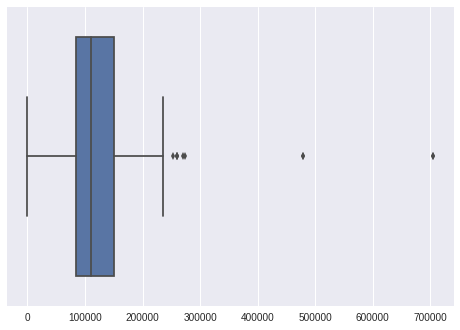

In [45]:
sns.boxplot(['final_salary'],data=salary_plot)
plt.show()

In [46]:
salary_plot[salary_plot.final_salary>300000].shape

(4, 11)

In [47]:
valid_salary=data[(data.final_salary>0) & (data.final_salary<300000)]
valid_salary.reset_index(range(0,len(valid_salary)),inplace=True)

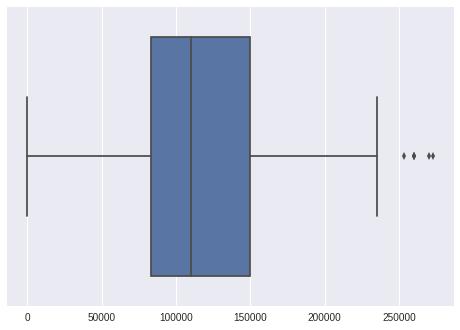

In [48]:
sns.boxplot(['final_salary'],data=valid_salary)
plt.show()

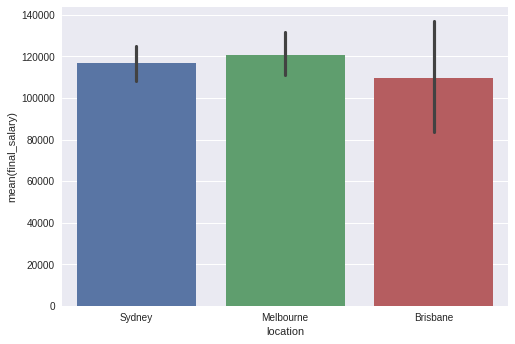

In [49]:
#Effects of categorical varibles in the price. 
sns.barplot(x="location", y="final_salary", data=valid_salary)
plt.show()

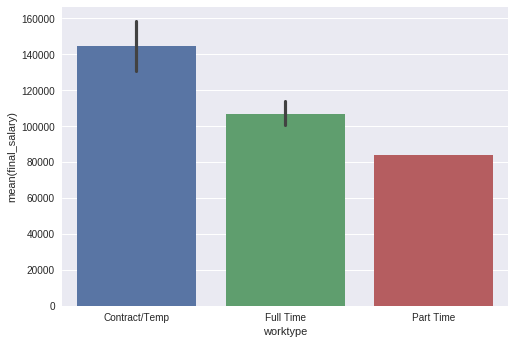

In [50]:
sns.barplot(x="worktype", y="final_salary", data=valid_salary)
plt.show()

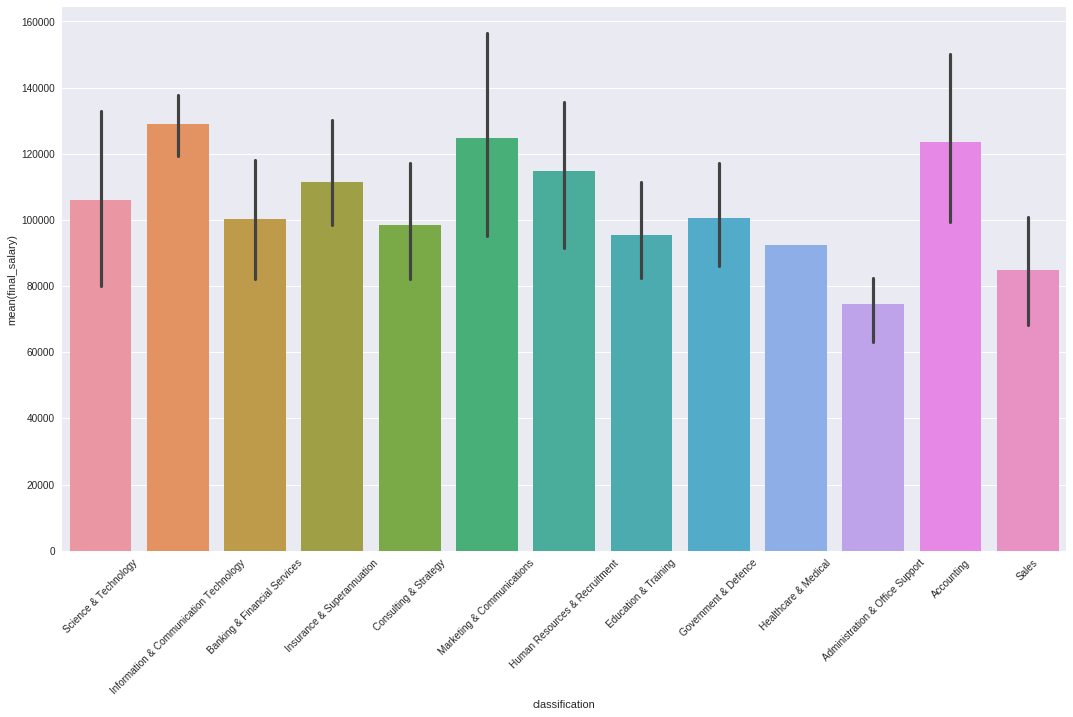

In [51]:
plt.figure(figsize=(18,10))
sns.barplot(x="classification", y="final_salary", data=valid_salary)
plt.xticks(rotation=45)
plt.show()

In [52]:
valid_salary.columns

Index(['index', 'keyword', 'pagenumber', 'title', 'location', 'region',
       'worktype', 'advertiser', 'classification', 'jd', 'url',
       'final_salary'],
      dtype='object')

In [53]:
valid_salary.title.value_counts()

BusinessIntelligence                                                                17
DataAnalyst                                                                         10
Data Analyst                                                                         8
Data Scientist                                                                       7
DataScientist                                                                        7
DataArchitect                                                                        4
SQL Developer                                                                        4
Business Intelligence Report Developer                                               4
Account Director | Key Account Manager  Business Information Services                3
Data Analyst / Data Scientist                                                        3
Candidate Manager | IT Recruitment | Flexible Hours | $140K package                  3
Analyst                                    

In [54]:
valid_salary.title.nunique()

173

In [55]:
total_words = [title for title in valid_salary['title']]

vectorizer = CountVectorizer(analyzer = "word",ngram_range=(1,2),stop_words = 'english') 
train_data_features = vectorizer.fit_transform(total_words)

title_words = pd.DataFrame(vectorizer.transform(total_words).todense(), columns=vectorizer.get_feature_names())

title_words.sum().nlargest(35)
# from the list of ngram one and 2 try to find the title which can be used.

data                     87
analyst                  84
business                 58
manager                  35
scientist                32
data scientist           30
intelligence             30
senior                   30
business intelligence    29
data analyst             28
developer                26
bi                       19
businessintelligence     17
account                  15
analytics                14
consultant               14
project                  14
amp                      12
reporting                12
sql                      12
architect                11
business analyst         11
analyst data             10
dataanalyst              10
development              10
reporting analyst        10
contract                  9
development manager       9
insights                  9
officer                   9
sydney                    9
technical                 9
business development      8
junior                    8
manager business          8
dtype: int64

In [56]:
# From above take the words for titles and looking for a combination to replace with that title. 
keyword=['data','business','consultant','manager','developer','analyst','architect','scientist','senior','junior','businessintelligence','intelligence','dataanalyst']

In [57]:
title_list = []

for row in range(0, len(valid_salary)):
    word_list=''
    title_words = valid_salary.ix[row, 'title'].lower()
    for word in title_words.split():
        if word in keyword:
            word_list+=word+' '
        
    if len(word_list)==0:
        word_list="mid level" # an assumption
    if 'dataanalyst' in word_list:
        word_list="data analyst "
    if 'businessintelligence' in word_list:
        word_list="business intelligence "
    
    title_list.append(word_list)


In [58]:
valid_salary['new_title'] = title_list


/home/mahendra/anaconda2/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [59]:
# Lets Look at JD and its working. Us the same method as title. Try to figure out the skills and buzz words 
# that are most used.

In [60]:
# making a list of stop words from base knowledge and from running the vectorization and checking the details
stop = stopwords.words('english')
stop += ['xa0', 'span', 'xc2', 'xe3']
stop.append("need")
stop.append("in")
stop.append("re")
stop.append("are")
stop.append("for")
stop.append("have")
stop.append("like")
stop.append("be")
stop.append("see")
stop.append("do")
stop.append("trade")
stop.append("u2026")
stop.append("http")
stop.append("mrzlgv")
stop.append("bit")
stop.append("ly")
stop.append("div")
stop.append("class")
stop.append("forum")
stop.append("item")
stop.append("shar")
stop.append("profile")
stop.append("es")

stop += ['people', 'go', 'know', 'think', 'get', 'us', 'really', 'way', 'xe2', 'got', 'want', 'well']

stop += ['com', 'textalign', 'style', 'au', 'fontfamily', 'apply', 'button', 'fontsize', 'sansserif', 'please']
stop += ['nthe', 'role', 'font', 'face', 'arial', '0pt', 'resume', 'send', 'em', '222222','cv','gov','href','9238']
stop += ['strong', 'amp', 'across', 'within', 'new', 'ensure', 'nif', 'nthis', 'nto', 'nyou','would','also','must']
stop += ['use', 'nkey', 'able', 'end', 'may', 'nwe', 'day', 'time', 'job', 'take','nas','submit','applicationin']
stop += ['12', 'month', 'confidenceplease', 'online', '2017', 'nmy', '_blank','clients','using','needs','one','02','03' ]
stop += ['drive', 'center', 'number', 'make', 'wwwsets', 'nlorica', 'staff','related','good','making','nour','plans' ]
stop += ['provide', 'key', 'ability','salary','23','reports','record','customer','applicant','track','confidential']
stop += ['work', 'team', 'working','sales','level','format','word','years','experience', 'project','management',
       'internal','external','seeking','large','develop','career','set']
stop+=[col for col in valid_salary.columns]

In [61]:
total_jd_words = [jd for jd in valid_salary['jd']]

vectorizer = CountVectorizer(analyzer = "word",ngram_range=(2,3),max_features=50,stop_words = stop) 
train_data_features = vectorizer.fit_transform(total_jd_words)

jd_words = pd.DataFrame(vectorizer.transform(total_jd_words).todense(), columns=vectorizer.get_feature_names())

print(jd_words.sum().nlargest(50))

# took max_features=800 after checking the number of repeatition of words. In the 800 range word count is only 10
# which is a good place to stop

business intelligence           152
communication skills             58
data science                     53
market data                      52
data scientist                   51
data analyst                     50
data analytics                   42
business analyst                 40
data sets                        39
machine learning                 38
data warehouse                   36
big data                         35
data analysis                    34
business requirements            29
financial services               28
business development             26
advanced analytics               24
complex data                     22
health care                      21
problem solving                  21
high performing                  20
continuous improvement           20
business users                   19
analytical skills                19
sql server                       18
data information                 18
successful candidate             17
verbal written              

In [62]:
valid_salary.columns

Index(['index', 'keyword', 'pagenumber', 'title', 'location', 'region',
       'worktype', 'advertiser', 'classification', 'jd', 'url', 'final_salary',
       'new_title'],
      dtype='object')

In [63]:
valid_salary.drop('index',axis=1,inplace=True)
valid_salary.drop('title',axis=1,inplace=True)
valid_salary.drop('pagenumber',axis=1,inplace=True)
valid_salary.drop('url',axis=1,inplace=True)

/home/mahendra/anaconda2/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/mahendra/anaconda2/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/mahendra/anaconda2/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipyk

In [64]:
valid_salary.rename(columns={'new_title':'title', 'final_salary':'salary'}, inplace=True)

/home/mahendra/anaconda2/envs/python3/lib/python3.6/site-packages/pandas/core/frame.py:2834: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


In [65]:
valid_salary = pd.concat([valid_salary, jd_words], axis=1)
valid_salary.shape

(266, 59)

In [66]:
# Now we do have a set of features that we can use.


### Prediction of salary using the features such as title,region,location,worktype,classification and skills from JD

since there are only few valid datapoints that gives salary I am going to predict the salary as class than a exact number. So here I am dealing this as a classifier problem and assuming everyone is interested to know the range of salary than the exact value.

In [67]:
valid_salary.salary.describe()

count       266.000000
mean     117160.827068
std       54360.208277
min         120.000000
25%       82852.250000
50%      110000.000000
75%      149550.000000
max      273000.000000
Name: salary, dtype: float64

In [68]:
# giving codes for salary
# code : 0 - salary less than 80,000 (juniors)
# code : 1 - salary between 80,000 and 125,000(mid level)
# code : 2 - salary more than 125,000 (senior)
valid_salary['salary_label'] = [1 if salary < 115000 else 0 for salary in valid_salary['salary']]
print(valid_salary['salary_label'].value_counts())

# changging to 2 class, high and low for easier classification with mid line as 150,000

1    142
0    124
Name: salary_label, dtype: int64


In [69]:
# valid_salary.columns

In [70]:
predictors=[col for col in valid_salary.columns if col not in ['salary','salary_label','jd','advertiser']]
y=valid_salary.salary_label
X=valid_salary[predictors]

In [71]:
# calculate the baseline accuracy:
y.value_counts()/y.count()


1    0.533835
0    0.466165
Name: salary_label, dtype: float64

In [72]:
X_dummies = pd.get_dummies(X, drop_first = True)

In [73]:
X=X_dummies.copy()

In [74]:
ss = StandardScaler()
Xs = ss.fit_transform(X)

In [75]:
X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size=0.2)

In [76]:
#Import and fit our logistic regression and test it too

lr = LogisticRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)


0.66666666666666663

In [77]:
scores = cross_val_score(lr, X_test, y_test, cv=10)
predictions = cross_val_predict(lr, X_test, y_test, cv=10)

In [78]:
scores.mean()
# The score seems to be better than baseline and if we had more datapoints to test and train,
#I suppose the model would do better

0.46500000000000002

In [79]:
# lets see how it performs when we have regularization done 

In [80]:
sgd_cls_params = {
    'loss':['log'],
    'penalty':['l1','l2'],
    'alpha':np.logspace(-5,2,50)
}

sgd_cls = SGDClassifier()
sgd_cls_gs = GridSearchCV(sgd_cls, sgd_cls_params, cv=10, verbose=1)

In [81]:
sgd_cls_gs.fit(Xs, y)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    3.6s finished


GridSearchCV(cv=10, error_score='raise',
       estimator=SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'loss': ['log'], 'penalty': ['l1', 'l2'], 'alpha': array([  1.00000e-05,   1.38950e-05,   1.93070e-05,   2.68270e-05,
         3.72759e-05,   5.17947e-05,   7.19686e-05,   1.00000e-04,
         1.38950e-04,   1.93070e-04,   2.68270e-04,   3.72759e-04,
         5.17947e-04,   7.19686e-04,...    1.93070e+01,   2.68270e+01,   3.72759e+01,   5.17947e+01,
         7.19686e+01,   1.00000e+02])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

In [82]:
print (sgd_cls_gs.best_params_)
print (sgd_cls_gs.best_score_)
sgd_cls = sgd_cls_gs.best_estimator_

{'alpha': 0.2682695795279722, 'loss': 'log', 'penalty': 'l2'}
0.669172932331


In [83]:
# Since "l2" is selected from the grid search lets try Ridge and its 

In [84]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import roc_curve, auc

In [85]:
lr_ridge = LogisticRegressionCV(penalty='l2', Cs=200, cv=25)
lr_ridge.fit(X_train, y_train)

LogisticRegressionCV(Cs=200, class_weight=None, cv=25, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [86]:
lr_ridge.C_

array([ 0.03739937])

In [87]:
yhat_ridge = lr_ridge.predict(X_test)
yhat_ridge_pp = lr_ridge.predict_proba(X_test)

In [88]:
fpr_ridge, tpr_ridge, _ = roc_curve(y_test, yhat_ridge_pp[:,1])
roc_auc_ridge = auc(fpr_ridge, tpr_ridge)


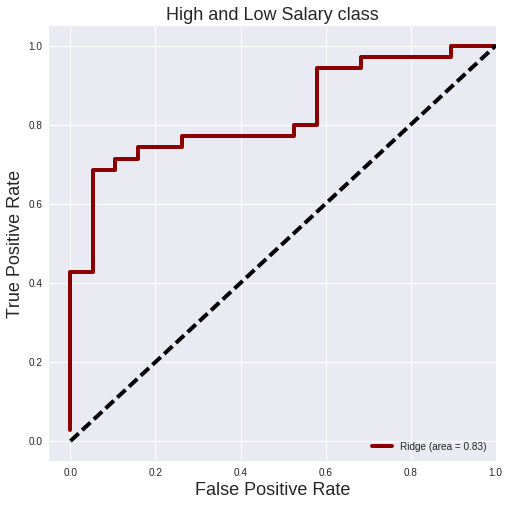

In [89]:
plt.figure(figsize=[8,8])

plt.plot(fpr_ridge, tpr_ridge, label='Ridge (area = %0.2f)' % roc_auc_ridge, 
         linewidth=4, color='darkred')

plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('High and Low Salary class', fontsize=18)
plt.legend(loc="lower right")
plt.show()

.74 ROC area is good enough

In [90]:
coefs_vars = pd.DataFrame({
        'coef':lr_ridge.coef_[0],
        'variable':X.columns,
        'abscoef':np.abs(lr_ridge.coef_[0])
    })
coefs_vars.sort_values('abscoef', ascending=False, inplace=True)
coefs_vars[:10]

,abscoef,coef,variable
91,0.254123,0.254123,title_business intelligence developer
66,0.249474,0.249474,worktype_Full Time
19,0.240591,-0.240591,data driven
75,0.226251,-0.226251,classification_Information & Communication Tec...
113,0.205350,-0.205350,title_manager business
125,0.203084,-0.203084,title_senior consultant
28,0.202208,-0.202208,financial services
119,0.196818,0.196818,title_senior analyst
34,0.196556,0.196556,intelligence data
1,0.183988,-0.183988,analytical skills


The top 10 performers in predicting the salary are as above from the l2 penalty on Ridge:

with gradient decent l2 penalty has been selected ROC seems to be good.
We will try decision tree classifier to check how it performs and what are its predictions

In [91]:
dtc_params = {
    'max_depth':[None,1,2,3,4,5],
    'max_features':[None,'log2','sqrt',2,3,4,5],
    'min_samples_split':[2,3,4,5,10,15,20,25,30,40,50]
}

from sklearn.model_selection import GridSearchCV

dtc_gs = GridSearchCV(DecisionTreeClassifier(), dtc_params, cv=5, verbose=1)

In [92]:
dtc_gs.fit(X, y)

Fitting 5 folds for each of 462 candidates, totalling 2310 fits


[Parallel(n_jobs=1)]: Done 2310 out of 2310 | elapsed:    7.9s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': [None, 1, 2, 3, 4, 5], 'max_features': [None, 'log2', 'sqrt', 2, 3, 4, 5], 'min_samples_split': [2, 3, 4, 5, 10, 15, 20, 25, 30, 40, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

In [93]:
dtc_best = dtc_gs.best_estimator_
print (dtc_gs.best_params_)
print (dtc_gs.best_score_)

# score is not that great. maybe because we are trying to predict 3 classes

{'max_depth': None, 'max_features': 'log2', 'min_samples_split': 10}
0.654135338346


In [94]:
yhat_dtc = dtc_gs.predict(X_test)
yhat_dtc_pp = dtc_gs.predict_proba(X_test)

In [95]:
fpr_dtc, tpr_dtc, _ = roc_curve(y_test, yhat_dtc_pp[:,1])
roc_auc_dtc = auc(fpr_dtc, tpr_dtc)


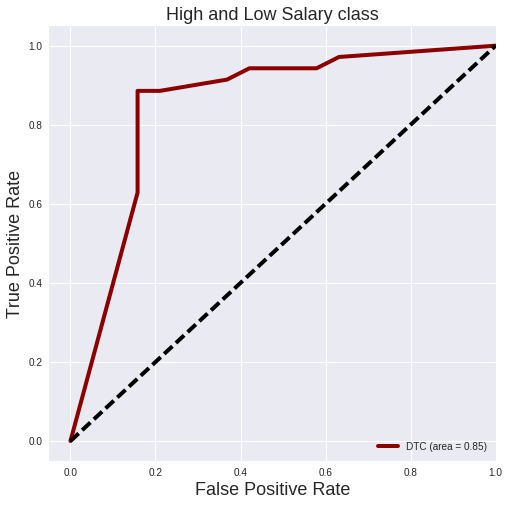

In [96]:
plt.figure(figsize=[8,8])

plt.plot(fpr_dtc, tpr_dtc, label='DTC (area = %0.2f)' % roc_auc_dtc, 
         linewidth=4, color='darkred')

plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('High and Low Salary class', fontsize=18)
plt.legend(loc="lower right")
plt.show()

In [97]:
# ROC curve seems to good. area= .70 seems to be good.

In [98]:
main_feature = pd.DataFrame({
        'feature':X.columns,
        'importance':dtc_best.feature_importances_
    })

main_feature.sort_values('importance', ascending=False, inplace=True)
main_feature = main_feature[main_feature['importance'] > 0]
main_feature

,feature,importance
8,business intelligence,0.068388
91,title_business intelligence developer,0.054109
4,big data,0.047185
10,business users,0.047142
75,classification_Information & Communication Tec...,0.043298
84,title_business analyst,0.041884
7,business development,0.037724
0,advanced analytics,0.036807
89,title_business intelligence,0.034442
13,complex data,0.032499


In [99]:
main_feature.feature.unique()

array(['business intelligence', 'title_business intelligence developer ',
       'big data', 'business users',
       'classification_Information & Communication Technology',
       'title_business analyst ', 'business development',
       'advanced analytics', 'title_business intelligence ',
       'complex data', 'data warehouse', 'keyword_Data-Scientist',
       'data information', 'reporting analyst', 'data analytics',
       'opportunity join', 'location_Melbourne', 'excellent opportunity',
       'region_ Ryde & Macquarie Park', 'sql server', 'title_junior ',
       'business analyst', 'data science', 'region_NA',
       'title_data analyst ', 'statistical machine',
       'successful candidate', 'classification_Consulting & Strategy',
       'client leading', 'data business', 'title_senior analyst ',
       'wide range', 'responsibilities include',
       'classification_Education & Training', 'analytical skills',
       'classification_Marketing & Communications', 'financial se

#### Summary 
Finally we have found out some of the features and buzz words that have an impact on the salary classification.
To predict The salary the above features have an impact.
some of the main features that are directly affecting the salary are classification/ industry of job, which are 
Information & Communication Technology, Consulting & Strategy, Education & Training, Marketing & Communications. It also shows location have an impact.
If we look through the key words or group of words that have impact on Salary some of them are "business intelligence", "big data", "business development", "advanced analytics", "data analysis", "data driven",  "high performing".

## Report

Here I have tried to find the Factors that affect the jobs. Mainly the skill keywords and other features like title, location, classification etc.


### Approach:

Here I have scrapped the data and details from Seek.com with the keywords Data scientist, data analyst, Business intelligence, Business analyst from 3 different cities which are Melbourne, Sydney and Brisbane. 

After scrapping the data I have cleaned it according to industry standards and since a lot of records did not had salary data I have selected only records with salary

### Methods

I have selected the salary prediction as a classification problem and from the known data, created a new feature to tell wether its a high paying salary or low paying and set the limit as 115,000.

Here I have used Logistic Regression, then with a grid search selected "l2" penalty or Ridge as a feature selection. With Ridge selected Logistic Regression.

Used another model Decision Tree as classifier. 

From these 2 models found the key skills/ Buzz words and the features that affect mostly to the salary.

### Inference
From the 2 models I have implemented and tested some of the main features that are directly affecting the salary are classification/ industry of job, which are 
Information & Communication Technology, Consulting & Strategy, Education & Training, Marketing & Communications. It also shows location have an impact.
If we look through the key words or group of words that have impact on Salary some of them are "business intelligence", "big data", "business development", "advanced analytics", "data analysis", "data driven",  "high performing".

### Summary

Here I have implemented mainly 2 models to make it a classification problem. Here I have tried to predict high and low salary. Implemented mainly 2 models, one is Logistic regression and second a Decision Tree. Both of the classification seems to be a good predictor with approximately 75% area in ROC curve. 
From both the models I have found out the key skills and features that are related to the salary.

## Part2

Using the job postings you scraped for part 1, or potentially new job postings from a second round of scraping, identify features in the data related to job postings that can distinguish job titles from each other.

Here I am using the first scrapped dataset. But here I am using the entire dataset. Trying to predict  
what components of a job posting distinguish data scientists/ data analyst from other data jobs?

Here I am trying to use just the JD (Job Description) to predict whether its a job posting related to Data scientist or anything else.


In [100]:
# From the web scrapping using beautiful soup
# data = pd.read_csv('./Final_Post.csv')

In [101]:
data.columns

Index(['keyword', 'pagenumber', 'title', 'location', 'region', 'worktype',
       'advertiser', 'classification', 'jd', 'url', 'final_salary'],
      dtype='object')

In [102]:
data_scientist_df=data[['keyword','jd']]

In [103]:
data_scientist_df.keyword.value_counts()

Business-Intelligence    536
Data-Analyst             273
Data-Architect           143
Data-Scientist           135
Research-Scientist        20
Name: keyword, dtype: int64

In [104]:
data_scientist_df.dtypes

keyword    object
jd         object
dtype: object

In [105]:
data_scientist_df.keyword = data_scientist_df.keyword.map(lambda x: 1 if (x == 'Data-Scientist') | (x=='Data-Analyst') else 0)

/home/mahendra/anaconda2/envs/python3/lib/python3.6/site-packages/pandas/core/generic.py:2773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [106]:
data_scientist_df.keyword.value_counts()

0    699
1    408
Name: keyword, dtype: int64

In [107]:
data_scientist_df.dtypes

keyword     int64
jd         object
dtype: object

In [108]:
data_scientist_df.head()

,keyword,jd
0,1,[\nThe NRMA was born to keep people movingand ...
1,1,[DATA SCIENTIST TOP 100 ASX COMPANY\n6month c...
2,1,[\nAt Caltexwe’re with you all the way. We kee...
3,1,[A leading IM Professional Services consultanc...
4,1,[My client is seeking an experienced Data Scie...


In [109]:
# Trying Naive bayes in method to predict whether keyword/title is Data Scientist/ Data Analyst 
#from the Job Description
import pandas as pd, seaborn as sns, numpy as np, matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer 
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split, cross_val_score, ShuffleSplit
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB
from sklearn.linear_model import LogisticRegression

from sklearn.pipeline import Pipeline

In [110]:
# Let's use the CountVectorizer to count words for us
cvt      =  CountVectorizer(strip_accents='unicode', ngram_range=(1,1))
X_all    =  cvt.fit_transform(data_scientist_df['jd'])
columns  =  np.array(cvt.get_feature_names())          # ndarray (for indexing below)

# note this is a large sparse matrix. 
#    - rows are data_scientist, columns are words 
X_all

<1107x21145 sparse matrix of type '<class 'numpy.int64'>'
	with 209803 stored elements in Compressed Sparse Row format>

In [111]:
# Converting X_all toarray() may use too much memory
print (X_all.shape)
print ("Requires {} ints to do a .toarray()!".format(X_all.shape[0] * X_all.shape[1]))

(1107, 21145)
Requires 23407515 ints to do a .toarray()!


In [112]:
# So .. we'll use np.sum() to convert it directly from the sparse matrix!
# This is enormously more memory-efficient ...
#   It only requires one int per column since summing across columns is the total word count.

def get_freq_words(sparse_counts, columns):
    # X_all is a sparse matrix, so sum() returns a 'matrix' datatype ...
    #   which we then convert into a 1-D ndarray for sorting
    word_counts = np.asarray(X_all.sum(axis=0)).reshape(-1)

    # argsort() returns smallest first, so we reverse the result
    largest_count_indices = word_counts.argsort()[::-1]

    # pretty-print the results! Remember to always ask whether they make sense ...
    freq_words = pd.Series(word_counts[largest_count_indices], 
                           index=columns[largest_count_indices])

    return freq_words


freq_words = get_freq_words(X_all, columns)
freq_words[:20]


# From the words its clear these are the common words in english and we need to avoid those. Implementing the
# stop word "english"

and           19965
to            11546
the           10933
of             7971
in             6818
with           5305
data           4802
for            4507
span           4172
business       3636
experience     3193
will           3119
you            2811
is             2794
be             2715
on             2417
or             2034
as             1909
an             1888
our            1871
dtype: int64

In [113]:
cvt      =  CountVectorizer(strip_accents='unicode', stop_words="english", ngram_range=(1,1))
X_all    =  cvt.fit_transform(data_scientist_df['jd'])
columns  =  np.array(cvt.get_feature_names())

freq_words = get_freq_words(X_all, columns)

print(freq_words[:10])

# These are the words with ngram 1. So basically the buzz words

data          4802
span          4172
business      3636
experience    3193
style         1787
team          1718
role          1654
skills        1650
xa0           1638
work          1409
dtype: int64


In [114]:
# What if we change ngram to 2 to 4. what would be the common set of words.
cvt = CountVectorizer(stop_words="english", ngram_range=(2,4))
X_all = cvt.fit_transform(data_scientist_df['jd'])
columns  =  np.array(cvt.get_feature_names())

freq_words = get_freq_words(X_all, columns)
freq_words[0:20]
# This shows there are a lot of words thats unwanted for us. Lets add those to the stop words and try those.

span span                      1883
span style                      946
xa0 xa0                         807
span span span                  730
business intelligence           696
xa0 xa0 xa0                     511
style textalign                 500
fontfamily arial                447
xa0 xa0 xa0 xa0                 399
span span span span             369
sansserif fontsize              357
style fontfamily                337
span style fontfamily           333
style fontfamily arial          299
com au                          298
experience working              296
fontsize 10                     296
span style fontfamily arial     295
communication skills            295
textalign justify               294
dtype: int64

In [115]:
# making a list of stop words from base knowledge and from running the vectorization and checking the details
stop = stopwords.words('english')
stop += ['xa0', 'span', 'xc2', 'xe3']
stop.append("need")
stop.append("in")
stop.append("re")
stop.append("are")
stop.append("for")
stop.append("have")
stop.append("like")
stop.append("be")
stop.append("see")
stop.append("do")
stop.append("trade")
stop.append("u2026")
stop.append("http")
stop.append("mrzlgv")
stop.append("bit")
stop.append("ly")
stop.append("div")
stop.append("class")
stop.append("forum")
stop.append("item")
stop.append("shar")
stop.append("profile")
stop.append("es")

stop += ['people', 'go', 'know', 'think', 'get', 'us', 'really', 'way', 'xe2', 'got', 'want', 'well']

stop += ['com', 'textalign', 'style', 'au', 'fontfamily', 'apply', 'button', 'fontsize', 'sansserif', 'please']
stop += ['nthe', 'role', 'font', 'face', 'arial', '0pt', 'resume', 'send', 'em', '222222','cv','gov','href','9238']
stop += ['strong', 'amp', 'across', 'within', 'new', 'ensure', 'nif', 'nthis', 'nto', 'nyou','would','also','must']
stop += ['use', 'nkey', 'able', 'end', 'may', 'nwe', 'day', 'time', 'job', 'take','nas','submit','applicationin']
stop += ['12', 'month', 'confidenceplease', 'online', '2017', 'nmy', '_blank','clients','using','needs','one','02','03' ]
stop += ['drive', 'center', 'number', 'make', 'wwwsets', 'nlorica', 'staff','related','good','making','nour','plans' ]
stop += ['provide', 'key', 'ability','salary','23','reports','record','customer','applicant','track','confidential']
stop += ['work', 'team', 'working','sales','level','format','word','years','experience', 'project','management',
       'internal','external','seeking','large','develop','career','set']
stop+=[col for col in valid_salary.columns]

In [116]:

cvt = CountVectorizer(stop_words=stop, lowercase=True, strip_accents="unicode", ngram_range=(1,2))
X_all = cvt.fit_transform(data_scientist_df['jd'])
columns  =  np.array(cvt.get_feature_names())

freq_words = get_freq_words(X_all, columns)
freq_words[:20]

data                     4802
business                 3636
skills                   1650
development              1171
solutions                1009
reporting                 891
analytics                 885
technical                 833
support                   822
intelligence              801
information               784
opportunity               771
analysis                  746
services                  740
business intelligence     697
requirements              675
design                    664
bi                        638
knowledge                 610
environment               594
dtype: int64

In [117]:
# Find our training size
training_size = int(data_scientist_df.shape[0] * .8)

# Randomly sample our training data
data_scientist_train = data_scientist_df.sample(n=training_size, replace=True)

# Capture the rest of the dataset that's not "training" using an inverse mask (rows NOT IN training dataframe)
mask = data_scientist_df.index.isin(data_scientist_train.index)
data_scientist_test = data_scientist_df[~mask]

# Should be (2762, 1963) = training / testing = 70/30
data_scientist_train.shape[0], data_scientist_test.shape[0]

(885, 515)

In [118]:
# Baseline
data_scientist_train.keyword.sum() * 1.0 / data_scientist_train.keyword.count() * 1.0

0.40225988700564974

In [119]:
# MultinomialNB
pipeline = Pipeline([
    ('vect', cvt),
#     ('tfidf', TfidfTransformer()),
    ('cls', MultinomialNB())
]) 
pipeline.fit(data_scientist_train['jd'], data_scientist_train['keyword'])
predicted = pipeline.predict(data_scientist_test['jd'])
pipeline.score(data_scientist_test['jd'], data_scientist_test['keyword'])

0.79805825242718442

In [120]:
predicted = pipeline.predict(data_scientist_test["jd"])
print (classification_report(data_scientist_test["keyword"], predicted, target_names=["Data Scientist/Analyst", "Others"]))

                        precision    recall  f1-score   support

Data Scientist/Analyst       0.82      0.88      0.85       335
                Others       0.75      0.64      0.69       180

           avg / total       0.79      0.80      0.79       515



This seems to be a good score. Even though its not a great predictor alost 80 % is good.

In [121]:
# Alternative -- train on all data for later data mining of seek.com scrapping
# MultinomialNB
pipeline = Pipeline([
    ('vect', cvt),
#     ('tfidf', TfidfTransformer()),
    ('cls', MultinomialNB())
]) 
pipeline.fit(data_scientist_df['jd'], data_scientist_df['keyword'])
predicted = pipeline.predict(data_scientist_df['jd'])
pipeline.score(data_scientist_df['jd'], data_scientist_df['keyword'])

0.9439927732610659

In [122]:
#  Add predicted probabilities back to original dataframe
data_scientist_df['MultinomialNB_Predicted'] = predicted

/home/mahendra/anaconda2/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [123]:
predicted = pipeline.predict(data_scientist_df["jd"])
print (classification_report(data_scientist_df["keyword"], predicted, target_names=["Data Scientist/Analyst", "Others"]))

                        precision    recall  f1-score   support

Data Scientist/Analyst       0.97      0.94      0.95       699
                Others       0.90      0.96      0.93       408

           avg / total       0.95      0.94      0.94      1107



In [124]:
from sklearn.metrics import roc_curve

def plot_roc(y, probs, threshmarkers=None):
    fpr, tpr, thresh = roc_curve(y, probs)

    plt.figure(figsize=(8,8))
    plt.plot(fpr, tpr, lw=2)
   
    plt.xlabel("False Positive Rate\n(1 - Specificity)")
    plt.ylabel("True Positive Rate\n(Sensitivity)")
    plt.xlim([-0.025, 1.025])
    plt.ylim([-0.025, 1.025])
    plt.xticks(np.linspace(0, 1, 21), rotation=45)
    plt.yticks(np.linspace(0, 1, 21))
    plt.show()

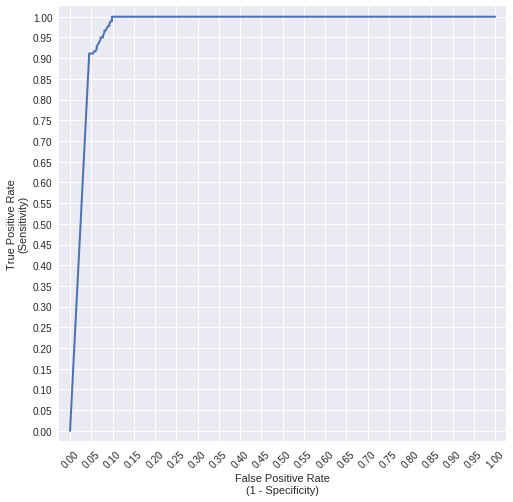

In [125]:
predicted_proba = pipeline.predict_proba(data_scientist_test['jd'])
plot_roc(data_scientist_test['keyword'], predicted_proba[:, 1])

If you train and test with the whole data it seems to be good. and can be used for a further webscrapping and predicting the title.

In [126]:
# LogisticRegression
pipeline = Pipeline([
    ('vect', cvt),
    ('tfidf', TfidfTransformer()),
    ('cls', LogisticRegression())
]) 
pipeline.fit(data_scientist_train['jd'], data_scientist_train['keyword'])
predicted = pipeline.predict(data_scientist_test['jd'])
pipeline.score(data_scientist_test['jd'], data_scientist_test['keyword'])

0.80000000000000004

In [127]:
predicted = pipeline.predict(data_scientist_test["jd"])
print (classification_report(data_scientist_test["keyword"], predicted, target_names=["Data Scientist/Analyst", "Others"]))

                        precision    recall  f1-score   support

Data Scientist/Analyst       0.80      0.92      0.86       335
                Others       0.80      0.57      0.67       180

           avg / total       0.80      0.80      0.79       515



Again this have almost 80% precision. 

In [128]:
# try with all data
# LogisticRegression
pipeline = Pipeline([
    ('vect', cvt),
    ('tfidf', TfidfTransformer()),
    ('cls', LogisticRegression())
]) 
pipeline.fit(data_scientist_df['jd'], data_scientist_df['keyword'])
predicted = pipeline.predict(data_scientist_df['jd'])
pipeline.score(data_scientist_df['jd'], data_scientist_df['keyword'])

0.91418247515808493

In [129]:
#  Add predicted probabilities back to original dataframe
data_scientist_df['Logistic_Predicted'] = predicted

/home/mahendra/anaconda2/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [130]:
predicted = pipeline.predict(data_scientist_test["jd"])
print (classification_report(data_scientist_test["keyword"], predicted, target_names=["Data Scientist/Analyst", "Others"]))

                        precision    recall  f1-score   support

Data Scientist/Analyst       0.91      0.97      0.94       335
                Others       0.94      0.81      0.87       180

           avg / total       0.92      0.92      0.91       515



With the full dataset the prediction seems to be good for the logistic regression.

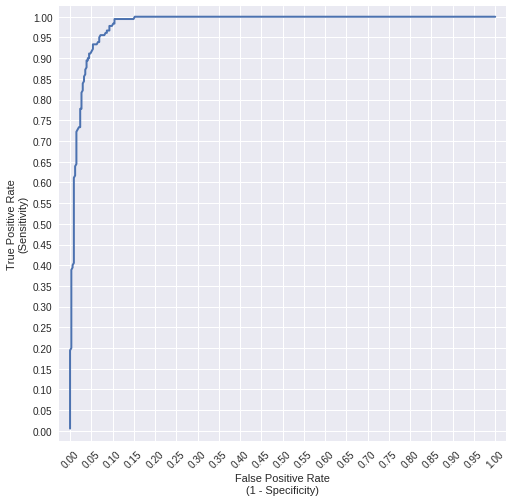

In [132]:
predicted_proba = pipeline.predict_proba(data_scientist_test['jd'])
plot_roc(data_scientist_test['keyword'], predicted_proba[:, 1])

ROC curve seems to be very good. and from this its understood that using Naive bayes method and Logistic regression is a very good form of predicting the Title.

### Summary

Here I have tried to predict whether a job title is Data scientist/Analyst from the job description. Implemented 2 models Naive Bayes Classifier and Logistic Regression. Tried implementing the model with 20% test data and with full dataset as well. For both models both ROC and classification report seems to be great. Both the models seems to be good which can also be used for predicting the title with the JD's for further scrapping or for internal use.